## Equidistribution of Coleman integrals

In [1]:
using Coleman, Plots, Nemo, Hecke


Welcome to Nemo version 0.17.5

Nemo comes with absolutely no warranty whatsoever


Welcome to 


$\require{action}$


    _    _           _
   | |  | |         | |
   | |__| | ___  ___| | _____
   |  __  |/ _ \/ __| |/ / _ \
   | |  | |  __/ (__|   <  __/
   |_|  |_|\___|\___|_|\_\___|
    
Version 0.8.2 ... 
 ... which comes with absolutely no warranty whatsoever
(c) 2015-2020 by Claus Fieker, Tommy Hofmann and Carlo Sircana



In [2]:
set_printing_mode(FlintPadicField, :val_unit)
N = 2

2

$$ P \in X (\mathbf Q)$$
genus 2 rank 1
$$ a = \int_P^\infty \omega_1,\, b = \int_P^\infty \omega_2 \in \mathbf Q_p \smallsetminus \mathbf Q$$
$$ a / b  \in \mathbf Q$$ 
for some CM curves, $a/b$ independent of $p$.

Annihilating differential lies in $H^0(X/\mathbf Q, \Omega^1) \subset H^0(X /\mathbf Q_p, \Omega^1)$, includes $p = \infty$.

In [3]:
function equidistdata(f; P = nothing, badp = [], pbound = 1000, a = 2, mod = 1, val = 0)
    if P == nothing
        P = rand(rational_points(a, f, 20))
    end
    @assert verify_pt(a, f, P)
    print("using P = ")
    println(P)
    data = []
    data2 = []
    RI = RegularIndices(a, f)
    for p in PrimesSet((2*N-1)*degree(f), pbound, mod, val)
        if p in badp
            continue
        end
        K = PadicField(p,N)
        #R,x = PolynomialRing(K,"x")
        h = change_base_ring(K, f)
        PK = map(x->K(x),P)
        #println(p)
        try
            ints = ColemanIntegrals(a, h, N, p, 1, PK, :inf)
            C = tuple(map(t -> Float64(lift(t//K(p)))/p, (ints[i,1] for i in RI))...)
            push!(data, C)
        catch e
        end
    end
    return data
end
R,x = PolynomialRing(QQ,"x")

(Univariate Polynomial Ring in x over Rational Field, x)

In [7]:
h =  4x^5 - 8x^4 + 8x^3 - 4x^2 + 1 # 997.b.997.1
edata = equidistdata(h, P = (0, -1), badp=[ZZ(997)],pbound=300)

using P = (0, -1)


56-element Array{Any,1}:
 (0.8823529411764706, 0.0)
 (0.0, 0.8421052631578947)
 (0.30434782608695654, 0.34782608695652173)
 (0.0, 0.20689655172413793)
 (0.3870967741935484, 0.5483870967741935)
 (0.0, 0.0)
 (0.5853658536585366, 0.17073170731707318)
 (0.627906976744186, 0.06976744186046512)
 (0.7872340425531915, 0.7021276595744681)
 (0.18867924528301888, 0.7169811320754716)
 (0.3728813559322034, 0.9830508474576272)
 (0.5245901639344263, 0.8032786885245902)
 (0.7611940298507462, 0.05970149253731343)
 ⋮
 (0.9356223175965666, 0.9098712446351931)
 (0.49372384937238495, 0.7949790794979079)
 (0.6348547717842323, 0.8008298755186722)
 (0.8446215139442231, 0.3745019920318725)
 (0.6342412451361867, 0.5758754863813229)
 (0.8745247148288974, 0.7186311787072244)
 (0.16728624535315986, 0.48698884758364314)
 (0.22140221402214022, 0.7380073800738007)
 (0.07220216606498195, 0.007220216606498195)
 (0.701067615658363, 0.3807829181494662)
 (0.823321554770318, 0.04240282685512368)
 (0.034129692832764506, 0.6279863481228669)

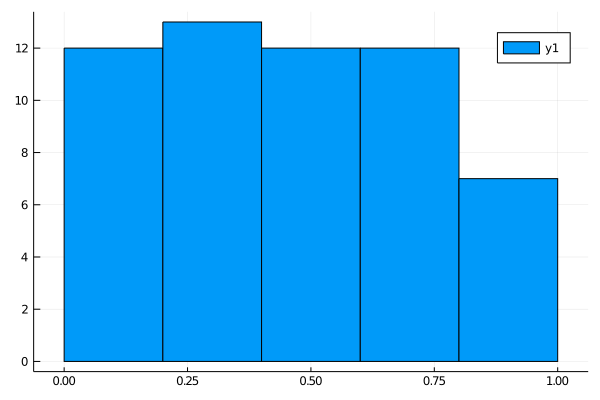

In [8]:
histogram(collect(collect(zip(edata...))[1]))

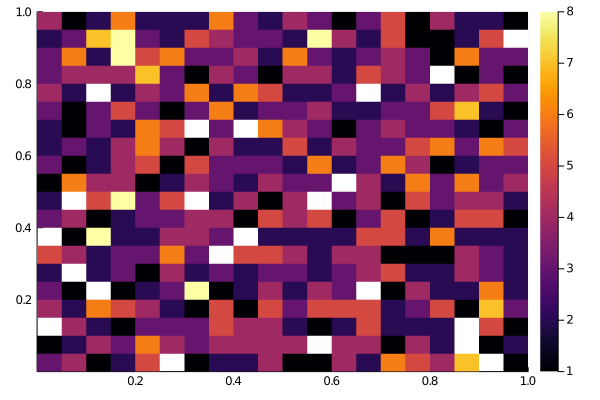

In [187]:
edata997 = equidistdata(4x^5 - 8x^4 + 8x^3 - 4x^2 + 1, P= (0, -1), pbound=10000, badp=[ZZ(997)]) # 997.b.997.1
histogram2d(edata997,bins=38) # 997

In [11]:
edata2080 =  equidistdata(4*x^5 + x^4 + 256*x^3 + 192*x^2 + 48*x + 4, P= (0, 2), pbound=500) # 2080.a.4160.2 2, 5, 13
histogram2d(edata2080,bins=73) # 2156.b.34496.1, 2, 7, 11

using P = (0, 2)


MethodError: MethodError: no method matching axes(::Tuple{Float64,Float64}, ::Int64)
Closest candidates are:
  axes(!Matched::Core.SimpleVector, ::Integer) at essentials.jl:608
  axes(::Tuple) at tuple.jl:23
  axes(!Matched::Number, ::Integer) at number.jl:65
  ...

In [12]:
[a+2*b for (a,b) in zip(edata2080[1], edata2080[2])]

2-element Array{Float64,1}:
 2.7306501547987616
 0.6346749226006192

In [13]:
histogram(edata)

MethodError: MethodError: no method matching axes(::Tuple{Float64,Float64}, ::Int64)
Closest candidates are:
  axes(!Matched::Core.SimpleVector, ::Integer) at essentials.jl:608
  axes(::Tuple) at tuple.jl:23
  axes(!Matched::Number, ::Integer) at number.jl:65
  ...

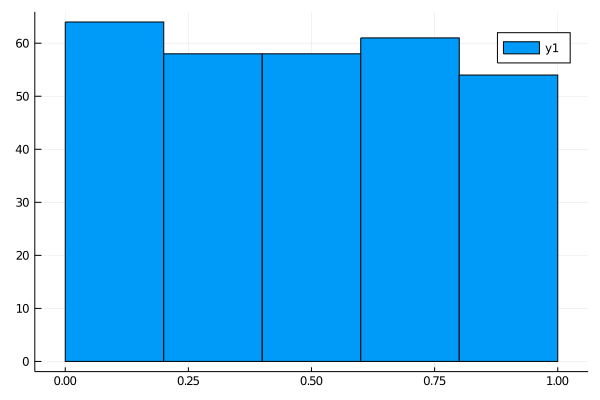

In [96]:
histogram(equidistdata(8x^5 - 3x^4 - 18x^3 + x^2 + 12x + 4, (0, 2), pbound=2000)) # 2156.b.34496.1, 2, 7, 11

In [138]:
edata = equidistdata(8x^5 - 3x^4 - 18x^3 + x^2 + 12x + 4, (0, 2), pbound=10000) # 2156.b.34496.1, 2, 7, 11

(Any[0.7647058823529411, 0.2631578947368421, 0.43478260869565216, 0.034482758620689655, 0.9032258064516129, 0.05405405405405406, 0.7209302325581395, 0.02127659574468085, 0.5660377358490566, 0.3728813559322034  …  0.7295438454536259, 0.45116654883345114, 0.2492177248410215, 0.2143504988410763, 0.8713868466109377, 0.6763669318296244, 0.06890654863695805, 0.4636646899185848, 0.1432728002407946, 0.6269928807781009], Any[0.47058823529411764, 0.47368421052631576, 0.13043478260869565, 0.9310344827586207, 0.1935483870967742, 0.8918918918918919, 0.5581395348837209, 0.9574468085106383, 0.8679245283018868, 0.2542372881355932  …  0.540912309092748, 0.09766690233309766, 0.501564550317957, 0.5712990023178475, 0.2572263067781247, 0.6472661363407511, 0.8621869027260839, 0.07267062016283043, 0.7134543995184107, 0.7460142384437982])

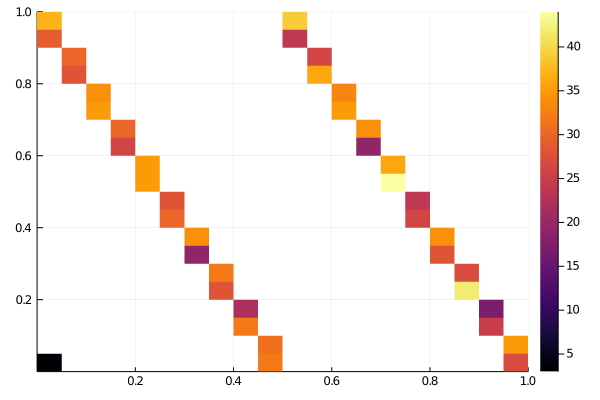

In [167]:
histogram2d(edata,bins=23) # 2156.b.34496.1, 2, 7, 11

In [166]:
[2*a+b for (a,b) in zip(edata[1], edata[2])]

1221-element Array{Float64,1}:
 2.0
 1.0
 1.0
 1.0
 2.0
 1.0
 2.0
 1.0
 2.0
 1.0
 1.0
 2.0
 1.0
 ⋮
 2.0
 2.0
 2.0
 1.0
 1.0
 1.0
 2.0
 2.0
 1.0
 1.0
 1.0
 2.0

In [172]:
edata2624 = equidistdata(4*x^5 - 95*x^4 + 16*x^3 + 42*x^2 + 12*x + 1, (0, -1), pbound=10000, badp=[ZZ(2), ZZ(41)]) #  2624.a.2624.2

(Any[0.7647058823529411, 0.10526315789473684, 0.7391304347826086, 0.6206896551724138, 0.5806451612903226, 0.9459459459459459, 0.9534883720930233, 0.723404255319149, 0.9433962264150944, 0.0  …  0.9278851016486295, 0.020805979194020805, 0.6130009084485717, 0.6263226846719742, 0.8616174841373754, 0.6317591380525627, 0.4594105220802736, 0.6208664187355513, 0.5957660278920437, 0.6067381931214278], Any[0.11764705882352941, 0.9473684210526315, 0.13043478260869565, 0.6896551724137931, 0.7096774193548387, 0.02702702702702703, 0.023255813953488372, 0.6382978723404256, 0.5283018867924528, 0.0  …  0.5360574491756852, 0.9895970104029896, 0.19349954577571415, 0.1868386576640129, 0.06919125793131231, 0.6841204309737187, 0.27029473895986317, 0.18956679063222434, 0.7021169860539781, 0.19663090343928608])

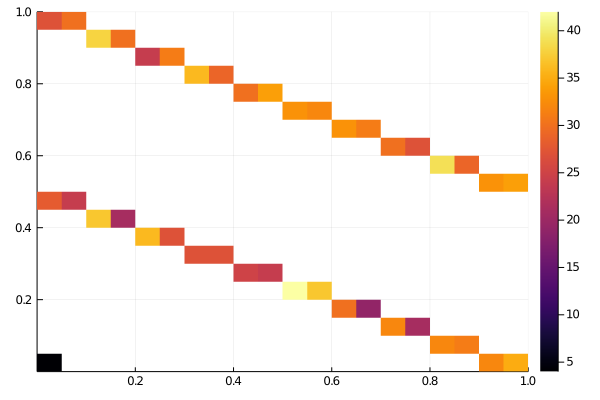

In [175]:
histogram2d(edata2624,bins=23) # 2624

In [174]:
[a+2*b for (a,b) in zip(edata2624[1], edata2624[2])]

1221-element Array{Float64,1}:
 1.0
 2.0
 1.0
 2.0
 2.0
 1.0
 1.0
 2.0
 2.0
 0.0
 2.0
 2.0
 2.0
 ⋮
 1.0
 2.0
 2.0
 2.0
 1.0
 1.0
 1.0
 2.0
 1.0
 1.0
 2.0
 1.0

In [ ]:
edata32624 = equidistdata(4*x^5 - 95*x^4 + 16*x^3 + 42*x^2 + 12*x + 1, (0, 1), pbound=3000, a=3, badp=[ZZ(2), ZZ(41)]) #  2624.a.2624.2

In [ ]:
histogram2d(edata32624,bins=23) # 2624

In [210]:
[a for (a,b) in zip(edata32624[1], edata32624[2])]

51-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [16]:
edata102400 = equidistdata(x^5 - x^3 - x, (-1, -1), pbound=30000, a=2, badp=[ZZ(2), ZZ(5)]) # 102400.b.102400.1

(Any[0.4117647058823529, 0.7894736842105263, 0.08695652173913043, 0.13793103448275862, 0.7096774193548387, 0.13513513513513514, 0.2682926829268293, 0.627906976744186, 0.851063829787234, 0.49056603773584906  …  0.29662236802463765, 0.5980789183038254, 0.8196847495063753, 0.34565631580706624, 0.1242271314461415, 0.1124068566845992, 0.43867499248672653, 0.6050602490069762, 0.7893806490344528, 0.4511654273233519], Any[0.7647058823529411, 0.6842105263157895, 0.6956521739130435, 0.5862068965517241, 0.967741935483871, 0.3783783783783784, 0.5365853658536586, 0.09302325581395349, 0.5957446808510638, 0.18867924528301888  …  0.6664211830080675, 0.7631112152347803, 0.7161741574913825, 0.19594210649463517, 0.09779084923632232, 0.4296120560029405, 0.035162119744882626, 0.3220401214993825, 0.5456758830003668, 0.8557471072726667])

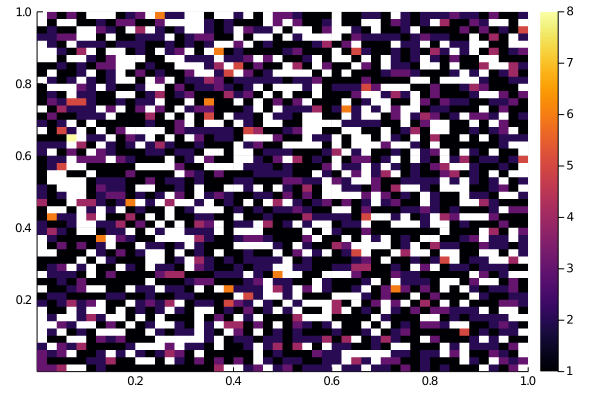

In [36]:
histogram2d(edata102400,bins=49) # 2624

In [17]:
length(edata102400[1])

3239

In [27]:
collect(zip(edata102400[1],edata102400[2]))[1:10]

10-element Array{Tuple{Any,Any},1}:
 (0.4117647058823529, 0.7647058823529411)
 (0.7894736842105263, 0.6842105263157895)
 (0.08695652173913043, 0.6956521739130435)
 (0.13793103448275862, 0.5862068965517241)
 (0.7096774193548387, 0.967741935483871)
 (0.13513513513513514, 0.3783783783783784)
 (0.2682926829268293, 0.5365853658536586)
 (0.627906976744186, 0.09302325581395349)
 (0.851063829787234, 0.5957446808510638)
 (0.49056603773584906, 0.18867924528301888)

In [98]:
collect(zip((Float64(1),Float64(2),Float64(3)),(1,2,3)))

3-element Array{Tuple{Float64,Int64},1}:
 (1.0, 1)
 (2.0, 2)
 (3.0, 3)

In [95]:
edata1024002 = equidistdata(x^5 - x^3 - x, (-1, -1), pbound=300, a=2, badp=[ZZ(2), ZZ(5)]) # 102400.b.102400.1

(Any[0.4117647058823529, 0.7894736842105263, 0.08695652173913043, 0.13793103448275862, 0.7096774193548387, 0.13513513513513514, 0.2682926829268293, 0.627906976744186, 0.851063829787234, 0.49056603773584906  …  0.9543568464730291, 0.549800796812749, 0.8132295719844358, 0.7832699619771863, 0.026022304832713755, 0.6088560885608856, 0.9386281588447654, 0.9715302491103203, 0.43109540636042404, 0.24232081911262798], Any[0.7647058823529411, 0.6842105263157895, 0.6956521739130435, 0.5862068965517241, 0.967741935483871, 0.3783783783783784, 0.5365853658536586, 0.09302325581395349, 0.5957446808510638, 0.18867924528301888  …  0.3983402489626556, 0.3705179282868526, 0.35019455252918286, 0.688212927756654, 0.39776951672862454, 0.1881918819188192, 0.07581227436823104, 0.6548042704626335, 0.5618374558303887, 0.48464163822525597])

In [97]:
edata = equidistdata(x^5 - x^3 - x + 1, pbound=200, a=2, badp=[ZZ(2), ZZ(5)]) # 102400.b.102400.1

0-element Array{Any,1}

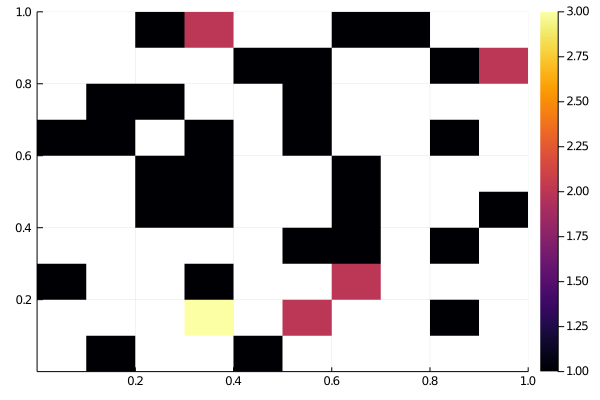

In [24]:
histogram2d(edata,bins=12)

In [129]:
edata = equidistdata(4*x^4 + 16*x^3 + 42*x^2 + 12*x + 1, pbound=200, a=3, badp=[ZZ(2), ZZ(5)])

35-element Array{Any,1}:
 (0.6086956521739131, 0.17391304347826086, 0.34782608695652173)
 (0.20689655172413793, 0.4482758620689655, 0.06896551724137931)
 (0.8378378378378378, 0.5135135135135135, 0.7567567567567568)
 (0.6585365853658537, 0.6341463414634146, 0.7560975609756098)
 (0.6511627906976745, 0.7209302325581395, 0.23255813953488372)
 (0.0, 0.39622641509433965, 0.9622641509433962)
 (0.3728813559322034, 0.559322033898305, 0.7627118644067796)
 (0.3114754098360656, 0.5573770491803278, 0.9836065573770492)
 (0.582089552238806, 0.8955223880597015, 0.43283582089552236)
 (0.9859154929577465, 0.19718309859154928, 0.08450704225352113)
 (0.726027397260274, 0.410958904109589, 0.6986301369863014)
 (0.35443037974683544, 0.17721518987341772, 0.26582278481012656)
 (0.0, 0.08433734939759036, 0.25301204819277107)
 ⋮
 (0.5973154362416108, 0.6778523489932886, 0.5369127516778524)
 (0.23178807947019867, 0.5033112582781457, 0.3509933774834437)
 (0.6050955414012739, 0.5031847133757962, 0.9745222929936306)
 (0.26993865030674846, 0.6073619631901841, 0.22085889570552147)
 (0.281437125748503, 0.9041916167664671, 0.4251497005988024)
 (0.9248554913294798, 0.6242774566473989, 0.5202312138728323)
 (0.4134078212290503, 0.7597765363128491, 0.6927374301675978)
 (0.23756906077348067, 0.26519337016574585, 0.861878453038674)
 (0.6492146596858639, 0.17801047120418848, 0.225130890052356)
 (0.8704663212435233, 0.07772020725388601, 0.0051813471502590676)
 (0.5786802030456852, 0.8020304568527918, 0.09644670050761421)
 (0.5879396984924623, 0.6482412060301508, 0.2964824120603015)

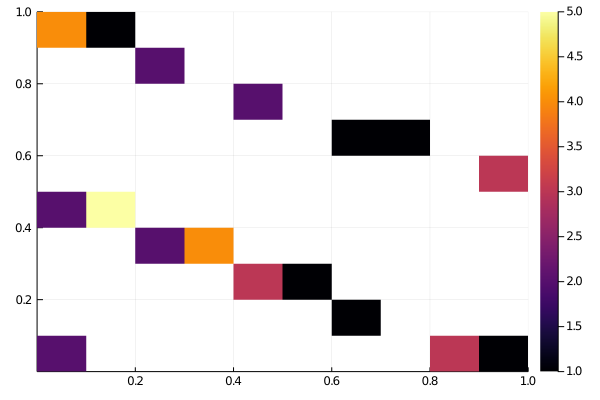

In [126]:
histogram2d(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]),bins=12)

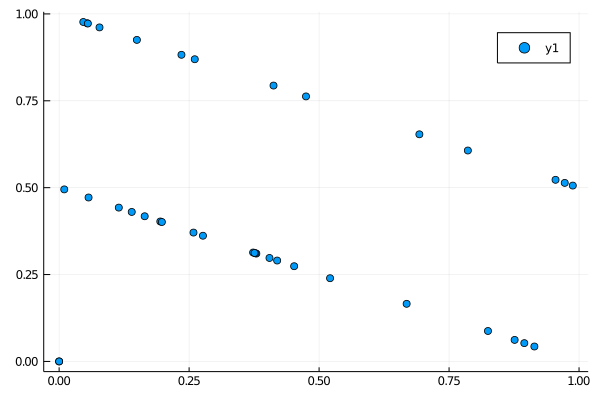

In [128]:
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]))

In [145]:
using AbstractPlotting, WGLMakie
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]),collect(collect(zip(edata...))[3]))

In [139]:
using AbstractPlotting

In [153]:
meshscatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]),collect(collect(zip(edata...))[3]), color = RGBAf0(0.9, 0.2, 0.4, 1), markersize = 0.05)

In [137]:
edata

35-element Array{Any,1}:
 (0.6086956521739131, 0.17391304347826086, 0.34782608695652173)
 (0.20689655172413793, 0.4482758620689655, 0.06896551724137931)
 (0.8378378378378378, 0.5135135135135135, 0.7567567567567568)
 (0.6585365853658537, 0.6341463414634146, 0.7560975609756098)
 (0.6511627906976745, 0.7209302325581395, 0.23255813953488372)
 (0.0, 0.39622641509433965, 0.9622641509433962)
 (0.3728813559322034, 0.559322033898305, 0.7627118644067796)
 (0.3114754098360656, 0.5573770491803278, 0.9836065573770492)
 (0.582089552238806, 0.8955223880597015, 0.43283582089552236)
 (0.9859154929577465, 0.19718309859154928, 0.08450704225352113)
 (0.726027397260274, 0.410958904109589, 0.6986301369863014)
 (0.35443037974683544, 0.17721518987341772, 0.26582278481012656)
 (0.0, 0.08433734939759036, 0.25301204819277107)
 ⋮
 (0.5973154362416108, 0.6778523489932886, 0.5369127516778524)
 (0.23178807947019867, 0.5033112582781457, 0.3509933774834437)
 (0.6050955414012739, 0.5031847133757962, 0.9745222929936306)
 (0.26993865030674846, 0.6073619631901841, 0.22085889570552147)
 (0.281437125748503, 0.9041916167664671, 0.4251497005988024)
 (0.9248554913294798, 0.6242774566473989, 0.5202312138728323)
 (0.4134078212290503, 0.7597765363128491, 0.6927374301675978)
 (0.23756906077348067, 0.26519337016574585, 0.861878453038674)
 (0.6492146596858639, 0.17801047120418848, 0.225130890052356)
 (0.8704663212435233, 0.07772020725388601, 0.0051813471502590676)
 (0.5786802030456852, 0.8020304568527918, 0.09644670050761421)
 (0.5879396984924623, 0.6482412060301508, 0.2964824120603015)

In [152]:

WGLMakie.scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]),collect(collect(zip(edata...))[3]))

┌ Error: error handling request
│   exception = (MethodError(resize!, (Point{3,Float32}[nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing], 21), 0x00000000000082f7), Base.StackTraces.StackFrame[(::ShaderAbstractions.var"#1#2"{WGLMakie.JSBuffer{Point{3,Float32}}})(::Tuple{typeof(resize!),Tuple{Int64}}) at types.jl:53, #invokelatest#1 at essentials.jl:712 [inlined], invokelatest at essentials.jl:711 [inlined], setindex!(::Observables.Observable{Tuple{Function,Tuple}}, ::Tuple{typeo

┌ Error: error handling request
│   exception = (MethodError(resize!, (Vec{4,Float32}[nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing], 21), 0x00000000000082f7), Base.StackTraces.StackFrame[(::ShaderAbstractions.var"#1#2"{WGLMakie.JSBuffer{Vec{4,Float32}}})(::Tuple{typeof(resize!),Tuple{Int64}}) at types.jl:53, #invokelatest#1 at essentials.jl:712 [inlined], invokelatest at essentials.jl:711 [inlined], setindex!(::Observables.Observable{Tuple{Function,Tuple}}, ::Tuple{typeof(re

┌ Error: error handling request
│   exception = (MethodError(resize!, (Vec{2,Float32}[nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing], 21), 0x00000000000082f7), Base.StackTraces.StackFrame[(::ShaderAbstractions.var"#1#2"{WGLMakie.JSBuffer{Vec{2,Float32}}})(::Tuple{typeof(resize!),Tuple{Int64}}) at types.jl:53, #invokelatest#1 at essentials.jl:712 [inlined], invokelatest at essentials.jl:711 [inlined], setindex!(::Observables.Observable{Tuple{Function,Tuple}}, ::Tuple{typeof(re

┌ Error: error handling request
│   exception = (MethodError(resize!, (Quaternion{Float32}[nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing], 21), 0x00000000000082f7), Base.StackTraces.StackFrame[(::ShaderAbstractions.var"#1#2"{WGLMakie.JSBuffer{Quaternion{Float32}}})(::Tuple{typeof(resize!),Tuple{Int64}}) at types.jl:53, #invokelatest#1 at essentials.jl:712 [inlined], invokelatest at essentials.jl:711 [inlined], setindex!(::Observables.Observable{Tuple{Function,Tuple}}, ::Tuple

┌ Error: error handling request
│   exception = (MethodError(resize!, (Point{3,Float32}[nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing], 13), 0x00000000000082f7), Base.StackTraces.StackFrame[(::ShaderAbstractions.var"#1#2"{WGLMakie.JSBuffer{Point{3,Float32}}})(::Tuple{typeof(resize!),Tuple{Int64}}) at types.jl:53, #invokelatest#1 at essentials.jl:712 [inlined], invokelatest at essentials.jl:711 [inlined], setindex!(::Observables.Observable{Tuple{Function,Tuple}}, ::Tuple{typeof(resize!),Tuple{Int64}}; notify::Observables.var"#6#8") at Observables.jl:132, setindex! at Observables.jl:126 [inlined], resize! at types.jl:46 [inlined], resize! at types.jl:61 [inlined], (::ShaderAbstractions.var

┌ Error: error handling request
│   exception = (MethodError(resize!, (Point{3,Float32}[nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing], 13), 0x00000000000082f7), Base.StackTraces.StackFrame[(::ShaderAbstractions.var"#1#2"{WGLMakie.JSBuffer{Point{3,Float32}}})(::Tuple{typeof(resize!),Tuple{Int64}}) at types.jl:53, #invokelatest#1 at essentials.jl:712 [inlined], invokelatest at essentials.jl:711 [inlined], setindex!(::Observables.Observable{Tuple{Function,Tuple}}, ::Tuple{typeof(resize!),Tuple{Int64}}; notify::Observables.var"#6#8") at Observables.jl:132, setindex! at Observables.jl:126 [inlined], resize! at types.jl:46 [inlined], resize! at types.jl:61 [inlined], (::ShaderAbstractions.var

Does the relationship $\theta_1 + 2\theta_2 = 0$ hold on any higher level for a CM curve?

In [21]:
function padicdata(f; P = nothing, badp = [], pbound = 1000, a = 2)
    if P == nothing
        P = rand(rational_points(a, f, 20))
    end
    @assert verify_pt(a, f, P)
    data = []
    data2 = []
    RI = RegularIndices(a, f)
    print(RI)
    for p in PrimesSet((2*N-1)*degree(f), pbound)
        if p in badp
            continue
        end
        K = PadicField(p,N)
        #R,x = PolynomialRing(K,"x")
        h = change_base_ring(K, f)
        PK = map(x->K(x),P)
        #println(p)
        try
            ints = ColemanIntegrals(a, h, N, p, 1, PK, :inf)
            C = tuple(map(t -> Float64(lift(t//K(p)))/p, (ints[i,1] for i in RI))...)
            push!(data, C)
            D = tuple((ints[i,1] for i in RI)...)
            push!(data2, D)
        catch e
        end
    end
    return data, data2
end
data,data2 = padicdata(4*x^5 + x^4 + 256*x^3 + 192*x^2 + 48*x + 4, P= (0, 2), pbound=200) # 2080.a.4160.2 2, 5, 13

[1, 2]

(Any[(25.17241379310345, 16.413793103448278), (7.870967741935484, 27.06451612903226), (14.513513513513514, 11.243243243243244), (29.097560975609756, 5.951219512195122), (40.2093023255814, 1.3953488372093024), (41.08510638297872, 2.9574468085106385), (26.60377358490566, 39.698113207547166), (14.915254237288135, 51.54237288135593), (40.032786885245905, 40.98360655737705), (55.40298507462686, 39.298507462686565)  …  (19.261146496815286, 147.36942675159236), (113.36196319018404, 106.31901840490798), (107.92814371257485, 113.03592814371258), (172.32369942196533, 86.83815028901734), (34.82122905027933, 72.08938547486034), (5.011049723756906, 87.99447513812154), (126.07329842931937, 127.96335078534031), (82.73575129533678, 151.6321243523316), (180.2994923857868, 8.350253807106599), (189.85427135678393, 4.57286432160804)], Any[(730*29 + O(29^3), 476*29 + O(29^3)), (244*31 + O(31^3), 839*31 + O(31^3)), (537*37 + O(37^3), 416*37 + O(37^3)), (1193*41 + O(41^3), 244*41 + O(41^3)), (1729*43 + O(43^3), 60*43 + O(43^3)), (1931*47 + O(47^3), 139*47 + O(47^3)), (1410*53 + O(53^3), 2104*53 + O(53^3)), (880*59 + O(59^3), 3041*59 + O(59^3)), (2442*61 + O(61^3), 2500*61 + O(61^3)), (3712*67 + O(67^3), 2633*67 + O(67^3))  …  (3024*157 + O(157^3), 23137*157 + O(157^3)), (18478*163 + O(163^3), 17330*163 + O(163^3)), (18024*167 + O(167^3), 18877*167 + O(167^3)), (29812*173 + O(173^3), 15023*173 + O(173^3)), (6233*179 + O(179^3), 12904*179 + O(179^3)), (907*181 + O(181^3), 15927*181 + O(181^3)), (24080*191 + O(191^3), 24441*191 + O(191^3)), (15968*193 + O(193^3), 29265*193 + O(193^3)), (35519*197 + O(197^3), 1645*197 + O(197^3)), (37781*199 + O(199^3), 910*199 + O(199^3))])

In [22]:
[a + 2*b for (a,b) in data2]

37-element Array{padic,1}:
 0 + O(29^3)
 0 + O(31^3)
 0 + O(37^3)
 0 + O(41^3)
 0 + O(43^3)
 0 + O(47^3)
 0 + O(53^3)
 0 + O(59^3)
 0 + O(61^3)
 0 + O(67^3)
 0 + O(71^3)
 0 + O(73^3)
 0 + O(79^3)
 ⋮
 0 + O(149^3)
 0 + O(151^3)
 0 + O(157^3)
 0 + O(163^3)
 0 + O(167^3)
 0 + O(173^3)
 0 + O(179^3)
 0 + O(181^3)
 0 + O(191^3)
 0 + O(193^3)
 0 + O(197^3)
 0 + O(199^3)

In [23]:
data,data2 = padicdata(8x^5 - 3x^4 - 18x^3 + x^2 + 12x + 4, P =(0, 2), pbound=100) # 2156.b.34496.1, 2, 7, 11

[1, 2]

(Any[(24.03448275862069, 9.931034482758621), (11.903225806451612, 7.193548387096774), (13.054054054054054, 10.891891891891891), (36.72093023255814, 12.55813953488372), (42.02127659574468, 9.957446808510639), (40.56603773584906, 24.867924528301888), (52.3728813559322, 13.254237288135593), (42.36065573770492, 37.278688524590166), (19.80597014925373, 27.388059701492537), (33.394366197183096, 4.211267605633803), (17.068493150684933, 38.863013698630134), (9.025316455696203, 60.949367088607595), (54.27710843373494, 57.44578313253012), (54.842696629213485, 68.31460674157303), (91.56701030927834, 10.8659793814433)], Any[(697*29 + O(29^3), 288*29 + O(29^3)), (369*31 + O(31^3), 223*31 + O(31^3)), (483*37 + O(37^3), 403*37 + O(37^3)), (1579*43 + O(43^3), 540*43 + O(43^3)), (1975*47 + O(47^3), 468*47 + O(47^3)), (2150*53 + O(53^3), 1318*53 + O(53^3)), (3090*59 + O(59^3), 782*59 + O(59^3)), (2584*61 + O(61^3), 2274*61 + O(61^3)), (1327*67 + O(67^3), 1835*67 + O(67^3)), (2371*71 + O(71^3), 299*71 + O(71^3)), (1246*73 + O(73^3), 2837*73 + O(73^3)), (713*79 + O(79^3), 4815*79 + O(79^3)), (4505*83 + O(83^3), 4768*83 + O(83^3)), (4881*89 + O(89^3), 6080*89 + O(89^3)), (8882*97 + O(97^3), 1054*97 + O(97^3))])

In [25]:

[2*a + b for (a,b) in data2]

15-element Array{padic,1}:
 0 + O(29^3)
 0 + O(31^3)
 0 + O(37^3)
 0 + O(43^3)
 0 + O(47^3)
 0 + O(53^3)
 0 + O(59^3)
 0 + O(61^3)
 0 + O(67^3)
 0 + O(71^3)
 0 + O(73^3)
 0 + O(79^3)
 0 + O(83^3)
 0 + O(89^3)
 0 + O(97^3)

Questions
---

1. When does this occur, what properties of CM (base field, RM ?) need to be satisfied, does the base point need to be rational.
2. Is this useful? Does knowing the annihilating differential ahead of time help you?
3. What is the analogue for QC ? Will the functions $\theta$ occuring there be "independent of $p$" in the bielliptic case?

### Sachi's example

In [80]:
edata = equidistdata(x^4+6*x^3+7*x^2-6*x, pbound=200, a=3, badp=[ZZ(2), ZZ(3), ZZ(17)])

using P = (1, 2)


38-element Array{Any,1}:
 (0.782608695652174, 0.08695652173913043, 0.8695652173913043)
 (0.896551724137931, 0.7586206896551724, 0.8620689655172413)
 (0.6451612903225806, 0.9032258064516129, 0.6451612903225806)
 (0.972972972972973, 0.05405405405405406, 0.918918918918919)
 (0.3902439024390244, 0.2682926829268293, 0.0975609756097561)
 (0.046511627906976744, 0.3488372093023256, 0.9767441860465116)
 (0.14893617021276595, 0.9361702127659575, 0.5957446808510638)
 (0.6037735849056604, 0.05660377358490566, 0.41509433962264153)
 (0.711864406779661, 0.559322033898305, 0.6610169491525424)
 (0.5573770491803278, 0.0, 0.0)
 (0.04477611940298507, 0.19402985074626866, 0.208955223880597)
 (0.8591549295774648, 0.5211267605633803, 0.7183098591549296)
 (0.8082191780821918, 0.8356164383561644, 0.2465753424657534)
 ⋮
 (0.2483221476510067, 0.1610738255033557, 0.7583892617449665)
 (0.8344370860927153, 0.7086092715231788, 0.4370860927152318)
 (0.10191082802547771, 0.8407643312101911, 0.7388535031847133)
 (0.6073619631901841, 0.9141104294478528, 0.12883435582822086)
 (0.6407185628742516, 0.7964071856287425, 0.30538922155688625)
 (0.6358381502890174, 0.8728323699421965, 0.1907514450867052)
 (0.5865921787709497, 0.12849162011173185, 0.30726256983240224)
 (0.9558011049723757, 0.7624309392265194, 0.856353591160221)
 (0.6073298429319371, 0.2198952879581152, 0.6701570680628273)
 (0.12435233160621761, 0.694300518134715, 0.9585492227979274)
 (0.22842639593908629, 0.1319796954314721, 0.8020304568527918)
 (0.37185929648241206, 0.33668341708542715, 0.9949748743718593)

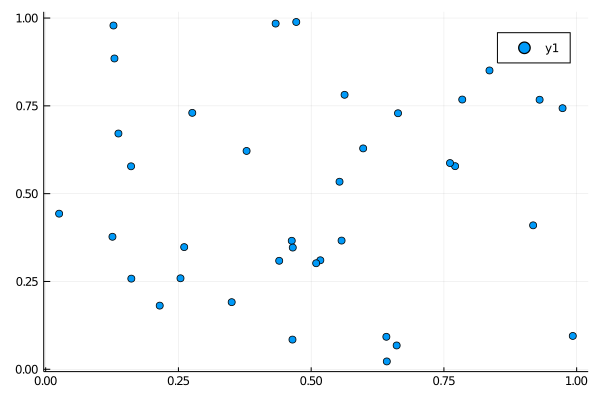

In [70]:
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]))

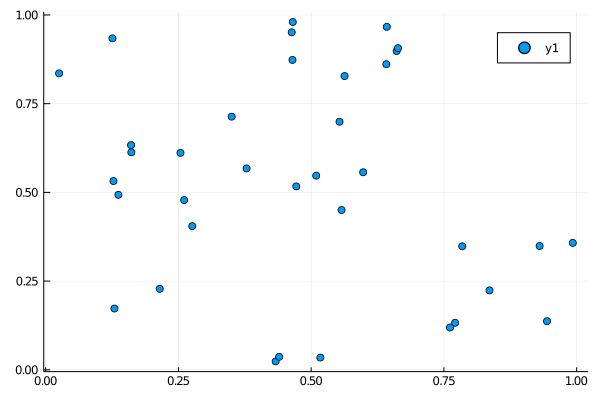

In [71]:
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[3]))

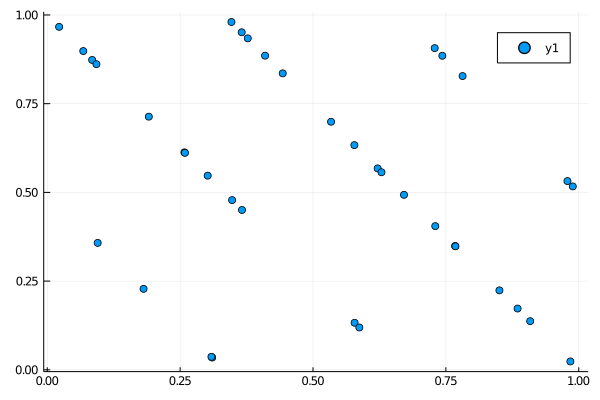

In [72]:
scatter(collect(collect(zip(edata...))[2]),collect(collect(zip(edata...))[3]))

In [73]:
[3*b + 2*c for (a,b,c) in edata]

38-element Array{Float64,1}:
 2.0
 1.0
 2.0
 3.0
 3.0
 3.0
 4.0
 2.0
 2.0
 3.0
 3.0
 2.0
 3.0
 ⋮
 1.0
 4.0
 2.0
 3.0
 3.0
 2.0
 2.0
 3.0
 1.0
 1.9999999999999998
 3.0
 3.0

In [89]:
edata = equidistdata(2*x^4+4*x^3-x^2-3*x + 1, pbound=200, a=3, badp=[ZZ(2), ZZ(3), ZZ(17)])

using P = (-3//2, -1//2)
Exception (padic_get_fmpz).  Negative valuation.
Exception (padic_get_fmpz).  Negative valuation.


36-element Array{Any,1}:
 (0.08695652173913043, 0.9565217391304348, 0.5217391304347826)
 (0.06896551724137931, 0.6551724137931034, 0.1724137931034483)
 (0.7741935483870968, 0.5806451612903226, 0.7096774193548387)
 (0.0975609756097561, 0.6341463414634146, 0.6829268292682927)
 (0.9767441860465116, 0.9302325581395349, 0.5348837209302325)
 (0.3404255319148936, 0.6808510638297872, 0.6595744680851063)
 (0.5471698113207547, 0.4339622641509434, 0.2830188679245283)
 (0.847457627118644, 0.22033898305084745, 0.3898305084745763)
 (0.4098360655737705, 0.8688524590163934, 0.06557377049180328)
 (0.7611940298507462, 0.746268656716418, 0.6268656716417911)
 (0.7534246575342466, 0.547945205479452, 0.726027397260274)
 (0.16455696202531644, 0.7468354430379747, 0.12658227848101267)
 (0.8674698795180723, 0.6385542168674698, 0.18072289156626506)
 ⋮
 (0.5704697986577181, 0.825503355704698, 0.087248322147651)
 (0.8609271523178808, 0.8211920529801324, 0.5894039735099338)
 (0.8726114649681529, 0.0, 0.0)
 (0.25766871165644173, 0.12269938650306748, 0.9386503067484663)
 (0.7005988023952096, 0.41317365269461076, 0.2934131736526946)
 (0.028901734104046242, 0.32947976878612717, 0.3352601156069364)
 (0.2011173184357542, 0.9385474860335196, 0.5307262569832403)
 (0.12154696132596685, 0.8784530386740331, 0.06077348066298342)
 (0.680628272251309, 0.7539267015706806, 0.6230366492146597)
 (0.9792746113989638, 0.2849740932642487, 0.35751295336787564)
 (0.7461928934010152, 0.3350253807106599, 0.8324873096446701)
 (0.2562814070351759, 0.7035175879396985, 0.6482412060301508)

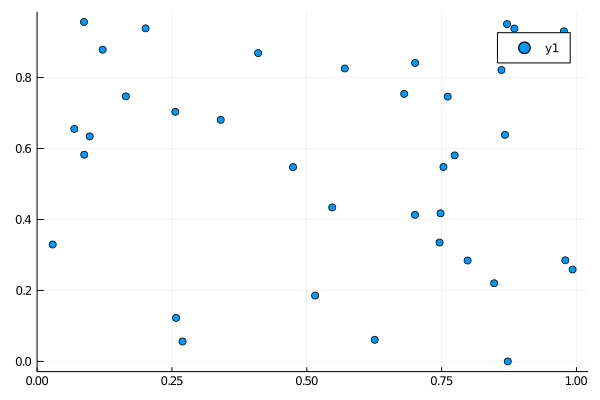

In [90]:
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]))

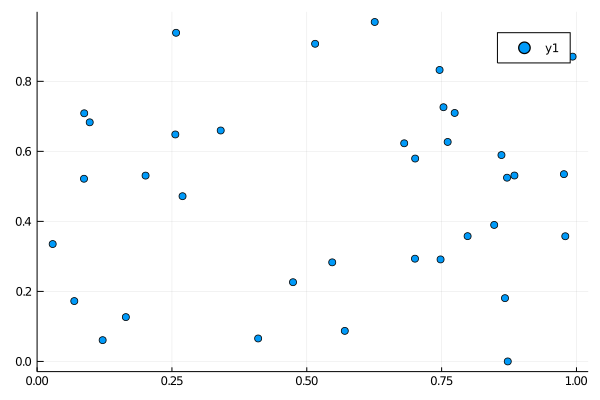

In [91]:
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[3]))

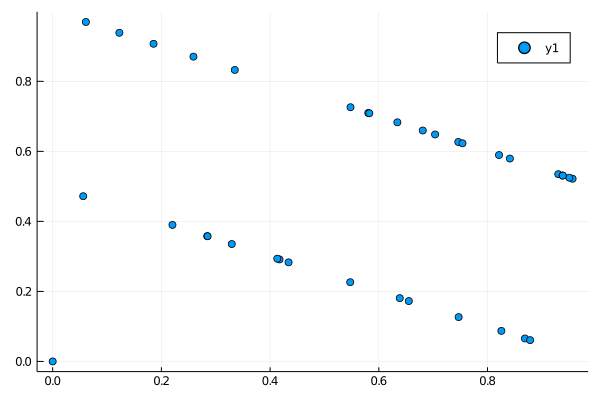

In [93]:
scatter(collect(collect(zip(edata...))[2]),collect(collect(zip(edata...))[3]))

In [94]:
[b + 2*c for (a,b,c) in edata]

36-element Array{Float64,1}:
 2.0
 1.0
 2.0
 2.0
 2.0
 2.0
 1.0
 1.0
 1.0
 2.0
 2.0
 1.0
 1.0
 ⋮
 1.0
 2.0
 0.0
 2.0
 1.0
 1.0
 2.0
 1.0
 2.0
 1.0
 2.0
 2.0

In [138]:
edata = equidistdata(2*x^4- 5, pbound=1000, a=3, badp=[ZZ(2), ZZ(3), ZZ(17)], mod = 3, val =2)

using P = (-2, 3)


83-element Array{Any,1}:
 (0.9130434782608695, 0.9565217391304348, 0.8695652173913043)
 (0.4482758620689655, 0.8275862068965517, 0.3793103448275862)
 (0.6341463414634146, 0.5853658536585366, 0.4634146341463415)
 (0.8723404255319149, 0.19148936170212766, 0.8297872340425532)
 (0.4528301886792453, 0.0, 0.8113207547169812)
 (0.5932203389830508, 0.864406779661017, 0.5423728813559322)
 (0.49295774647887325, 0.0, 0.07042253521126761)
 (0.5180722891566265, 0.6867469879518072, 0.3493975903614458)
 (0.9550561797752809, 0.5955056179775281, 0.7303370786516854)
 (0.3564356435643564, 0.40594059405940597, 0.0297029702970297)
 (0.9158878504672897, 0.40186915887850466, 0.34579439252336447)
 (0.6460176991150443, 0.6548672566371682, 0.5132743362831859)
 (0.15267175572519084, 0.6106870229007634, 0.5648854961832062)
 ⋮
 (0.3547257876312719, 0.21703617269544925, 0.3290548424737456)
 (0.23638470451911936, 0.7728852838933952, 0.6743916570104287)
 (0.492622020431328, 0.6515323496027242, 0.28944381384790013)
 (0.30665163472378804, 0.22209695603156707, 0.7970687711386697)
 (0.4632272228320527, 0.49396267837541163, 0.8968166849615807)
 (0.35414424111948334, 0.9730893433799784, 0.02906350914962325)
 (0.2678002125398512, 0.11477151965993623, 0.6716259298618491)
 (0.8130939809926082, 0.5205913410770855, 0.9609292502639916)
 (0.05666316894018888, 0.9097586568730325, 0.6264428121720882)
 (0.23171987641606592, 0.509783728115345, 0.8372811534500515)
 (0.46980552712384854, 0.8505629477993859, 0.759467758444217)
 (0.6327568667344863, 0.015259409969481181, 0.0762970498474059)

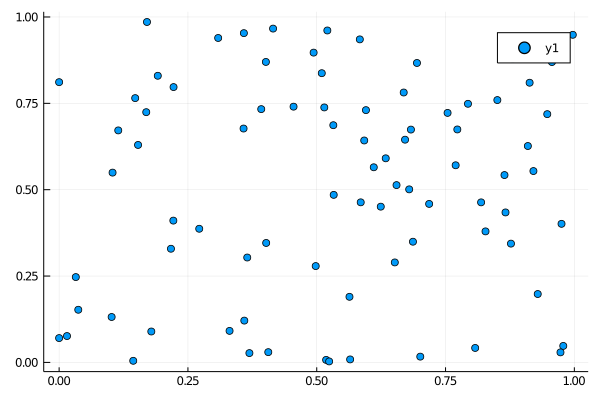

In [139]:
scatter(collect(collect(zip(edata...))[2]),collect(collect(zip(edata...))[3]))

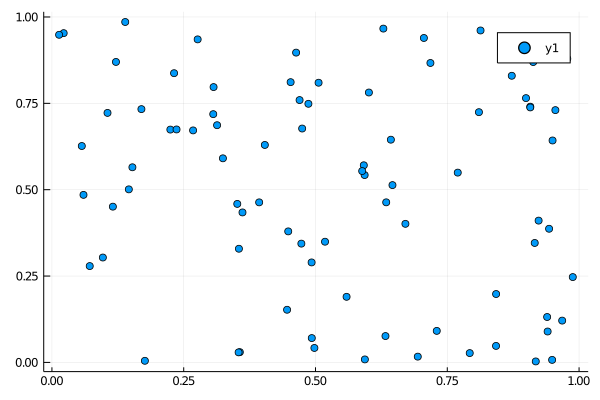

In [140]:
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[3]))

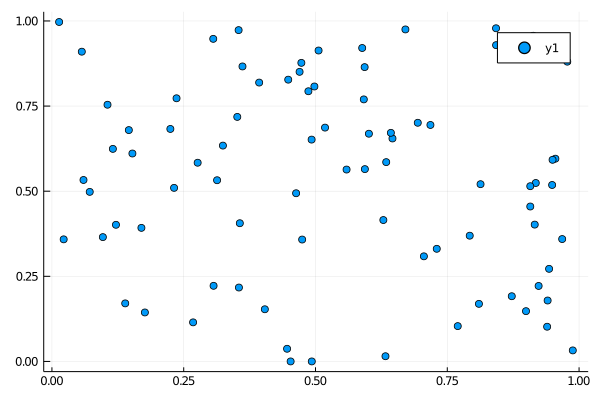

In [141]:
scatter(collect(collect(zip(edata...))[1]),collect(collect(zip(edata...))[2]))

In [ ]:
sqrt(2)*a + b

In [108]:
?PrimesSet

search: PrimesSet PrimeIdealsSet coprime_base_insert



```
PrimesSet(f::Integer, t::Integer) -> PrimesSet
PrimesSet(f::fmpz, t::fmpz) -> PrimesSet
```

Returns an iterable object $S$ representing the prime numbers $p$ for $f \le p \le t$. If $t=-1$, then the upper bound is infinite.

---

```
PrimesSet(f::Integer, t::Integer, mod::Integer, val::Integer)  
PrimesSet(f::fmpz, t::fmpz, mod::fmpz, val::fmpz)
```

Returns an iterable object $S$ representing the prime numbers $p$ for $f \le p \le t$ and $p\equiv val \bmod mod$ (primes in arithmetic progression).    If $t=-1$, then the upper bound is infinite.


$$ J = Jac(C)$$
$a \in O_K \acts J$ 
$$ O_K \to (J \to J)$$
$$\int_{n D} \omega =  \int_{a_* D} \omega = \int_{D} a^* \omega  = \int_D \underbrace{a \cdot \omega}_{\in H^0 (X/K, \Omega^1)}$$

In [ ]:

$$ A \omega_1 + B \omega_2$$

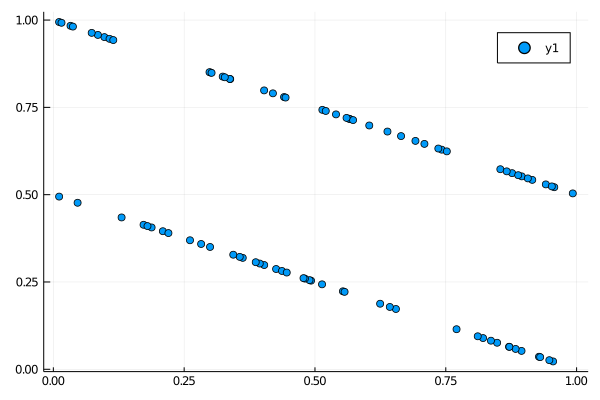

In [16]:

scatter(collect(collect(zip(edata2080...))[1]),collect(collect(zip(edata2080...))[2]))